In [1]:
import tensorflow as tf

from keras.models import Sequential

from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

import matplotlib.pyplot as plt

import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test)= mnist.load_data() # Splitting into training and testing data

input_shape = (28, 28, 1)

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [4]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')


In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
print("Shape of Training: ",x_test.shape)
print("Shape of Testing: ",x_test.shape)
          

Shape of Training:  (10000, 28, 28, 1)
Shape of Testing:  (10000, 28, 28, 1)


In [7]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation = "relu"))
model.add(Dropout (0.3))
model.add(Dense(10,activation = "softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs= 2)


Epoch 1/2
1875/1875 [==============================] - 40s 20ms/step - loss: 0.1977 - accuracy: 0.9406
Epoch 2/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0824 - accuracy: 0.9752


In [10]:
test_loss, test_acc= model.evaluate(x_test, y_test)

print("Loss=%.3f" %test_loss)

print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0531 - accuracy: 0.9835
Loss=0.053
Accuracy=0.984


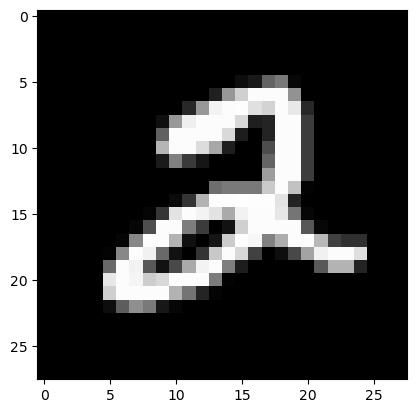

In [11]:
image = x_train[5]

plt.imshow(np.squeeze(image), cmap='gray')

plt.show()

In [13]:
image=image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

predict_model = model.predict([image])

print("Pedicted class: {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 167ms/step
Pedicted class: 2
